In [2]:
from model import CNN, shallow_CNN, deep_CNN
from pathlib import Path
import torchaudio
import numpy as np
import torch
import matplotlib.pyplot as plt

# Music Visulization

In [3]:
music_file_path = Path('/home/siyuan/class/cmsc734/sound_vis/deep_model/test.mp3')
model_path = Path('/home/siyuan/class/cmsc734/sound_vis/deep_model/best_model.ckpt')

if not music_file_path.exists():
    raise ValueError('Music file does not exist')
if not model_path.exists():
    raise ValueError('Model file does not exist')


In [4]:
def adjust_audio_length(wav, num_samples, num_chunks):
    hop = (len(wav) - num_samples) // num_chunks
    wav = np.array([wav[i * hop : i * hop + num_samples] for i in range(num_chunks)])
    return wav

In [5]:
num_sec= 30
num_samples = 22050 * num_sec  # 2 seconds
num_chunks = 60


net = CNN()
net.load_state_dict(torch.load(model_path))

waveform, sr_intense = torchaudio.load(music_file_path)  
waveform = waveform.mean(dim=0)  # Convert to mono by averaging the channels  

wav = waveform.squeeze().numpy()
# adjust audio length
wav_chunks = adjust_audio_length(wav,num_samples=num_samples, num_chunks=num_chunks ).astype('float32')
wav_chunks = torch.from_numpy(wav_chunks).unsqueeze(0)


torch.Size([1, 60, 661500])
(1, 30, 20)


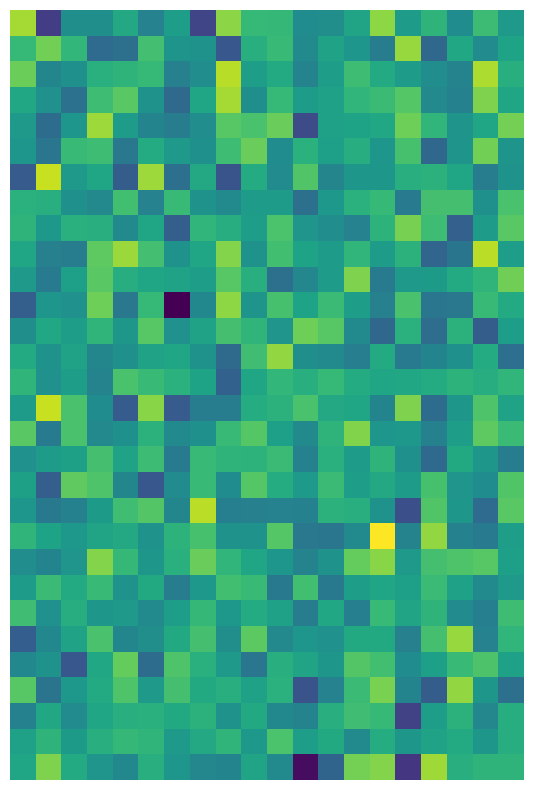

In [8]:
features = []
print(wav_chunks.shape)
for i, data in enumerate(wav_chunks):
    output = net(data)
    feature_maps = output.detach().numpy()
    feature_maps = np.reshape(feature_maps, (30, 20)) 
    # plot feature map
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(feature_maps, cmap='viridis')
    ax.axis('off')
    features.append(feature_maps)

print(np.array(features).shape)
# save as npz

# np.save('feature_maps_1_2_music.npy', features)



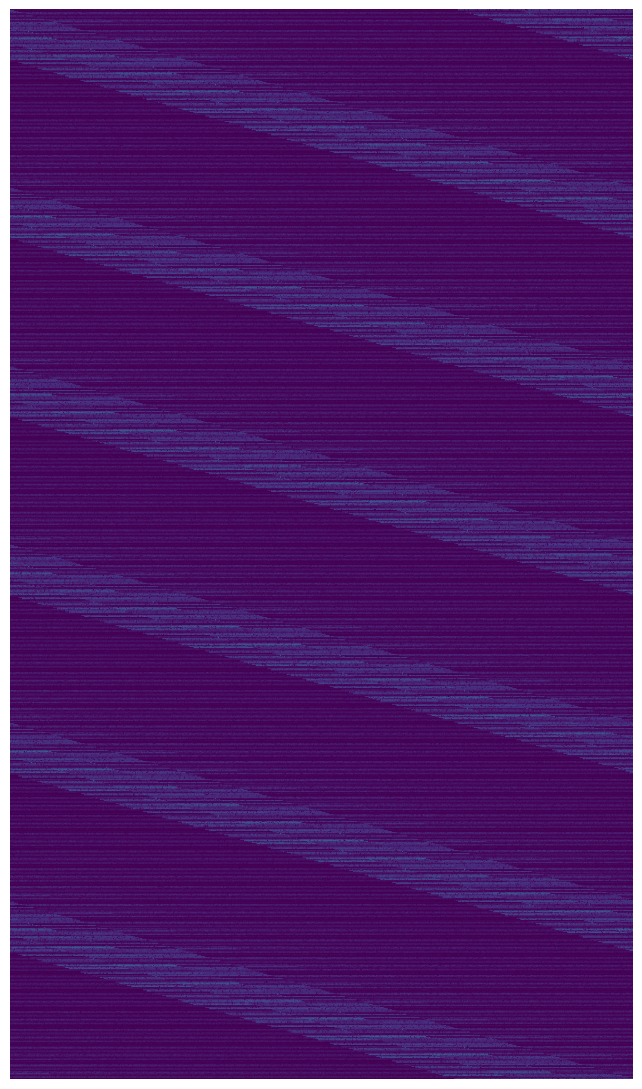

In [39]:
# num_sec= 30
# num_samples = 22050 * num_sec  # 2 seconds
# num_chunks = 60


# net = shallow_CNN()
# net.load_state_dict(torch.load(model_path))

# waveform, sr_intense = torchaudio.load(music_file_path)  
# waveform = waveform.mean(dim=0)  # Convert to mono by averaging the channels  

# wav = waveform.squeeze().numpy()
# # adjust audio length
# wav_chunks = adjust_audio_length(wav,num_samples=num_samples, num_chunks=num_chunks ).astype('float32')
# wav_chunks = torch.from_numpy(wav_chunks).unsqueeze(0)
# for i, data in enumerate(wav_chunks):
#     output = net(data)
#     feature_maps = output.detach().numpy().flatten()
#     feature_maps = np.reshape(feature_maps, (1926,1120)) 
#     # plot feature map
#     fig, ax = plt.subplots(figsize=(19, 11))
#     ax.imshow(feature_maps, cmap='viridis')
#     ax.axis('off')
    
    
#     plt.tight_layout()  
#     plt.show()  
#     break

# features = []
# print(wav_chunks.shape)
# for i, data in enumerate(wav_chunks):
#     output = net(data)
#     feature_maps = output.detach().numpy()
#     feature_maps = np.reshape(feature_maps, (1926,1120)) 
#     # resize to 30*20
    
#     # plot feature map
#     # fig, ax = plt.subplots(figsize=(10, 10))
#     # ax.imshow(feature_maps, cmap='viridis')
#     # ax.axis('off')
#     features.append(feature_maps)

# print(np.array(features).shape)
# # save as npz
# np.save('feature_maps_1_2_noise.npy', features)

# Sound Visulization

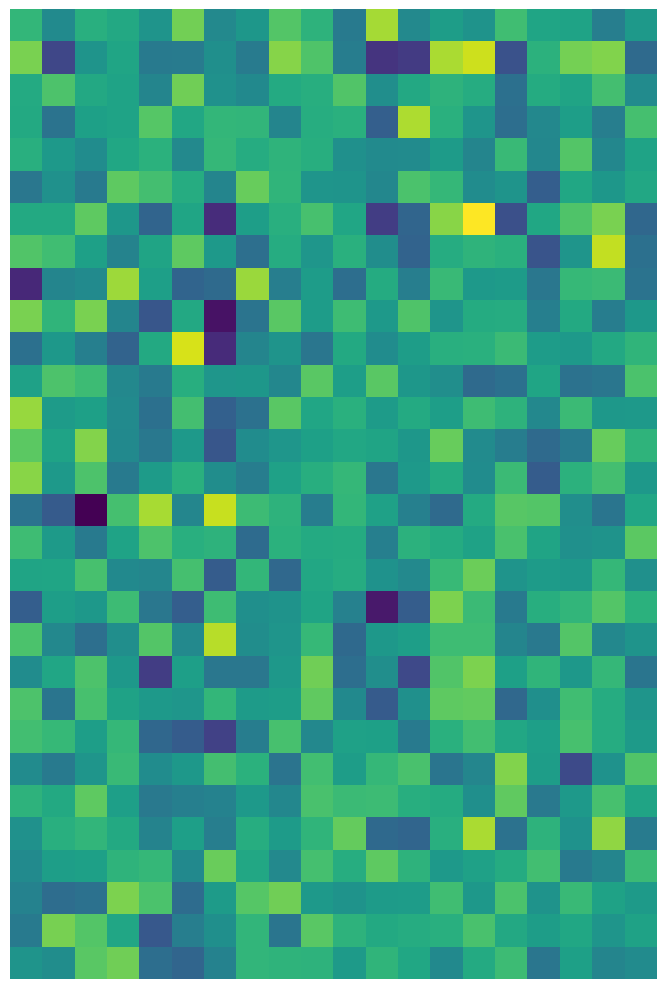

In [9]:
music_file_path = Path('/home/siyuan/class/cmsc734/sound_vis/deep_model/01-White-Noise-10min.mp3')
model_path = Path('/home/siyuan/class/cmsc734/sound_vis/deep_model/best_model.ckpt')

if not music_file_path.exists():
    raise ValueError('Music file does not exist')
if not model_path.exists():
    raise ValueError('Model file does not exist')
num_sec= 30
num_samples = 22050 * num_sec  # 2 seconds
num_chunks = 60


net = CNN()
net.load_state_dict(torch.load(model_path))

waveform, sr_intense = torchaudio.load(music_file_path)  
waveform = waveform.mean(dim=0)  # Convert to mono by averaging the channels  

wav = waveform.squeeze().numpy()
# adjust audio length
wav_chunks = adjust_audio_length(wav,num_samples=num_samples, num_chunks=num_chunks ).astype('float32')
wav_chunks = torch.from_numpy(wav_chunks).unsqueeze(0)

for i, data in enumerate(wav_chunks):
    output = net(data)
    feature_maps = output.detach().numpy()
    feature_maps = np.reshape(feature_maps, (30, 20)) 
    # plot feature map
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(feature_maps, cmap='viridis')
    ax.axis('off')
    
    
    plt.tight_layout()  
    plt.show()  
    break

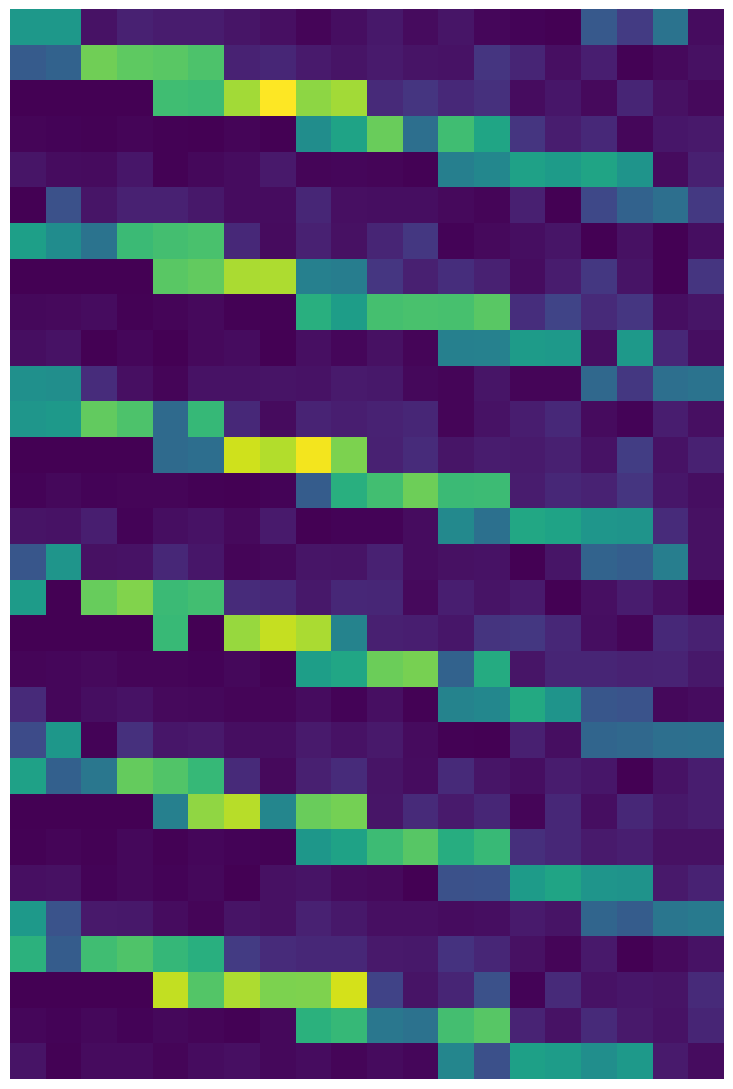

In [10]:
num_sec= 30
num_samples = 22050 * num_sec  # 2 seconds
num_chunks = 60


net = shallow_CNN()
net.load_state_dict(torch.load(model_path))

waveform, sr_intense = torchaudio.load(music_file_path)  
waveform = waveform.mean(dim=0)  # Convert to mono by averaging the channels  

wav = waveform.squeeze().numpy()
# adjust audio length
wav_chunks = adjust_audio_length(wav,num_samples=num_samples, num_chunks=num_chunks ).astype('float32')
wav_chunks = torch.from_numpy(wav_chunks).unsqueeze(0)
features = []
for i, data in enumerate(wav_chunks):
    output = net(data)
    feature_maps = output.detach().numpy().flatten()
    feature_maps = np.reshape(feature_maps, (1926,1120)) 
    feature_maps = torch.tensor(feature_maps)
    feature_maps = torch.nn.functional.interpolate(feature_maps.unsqueeze(0).unsqueeze(0), size=(30,20), mode='bilinear').squeeze(0).squeeze(0).numpy()
    fig, ax = plt.subplots(figsize=(19, 11))
    ax.imshow(feature_maps, cmap='viridis')
    ax.axis('off')

    features.append(feature_maps)
    
    plt.tight_layout()  
    plt.show()  
    break

    # save as npz)
np.save('feature_maps_1_2_noise.npy', features)

## Loudness Visulization 

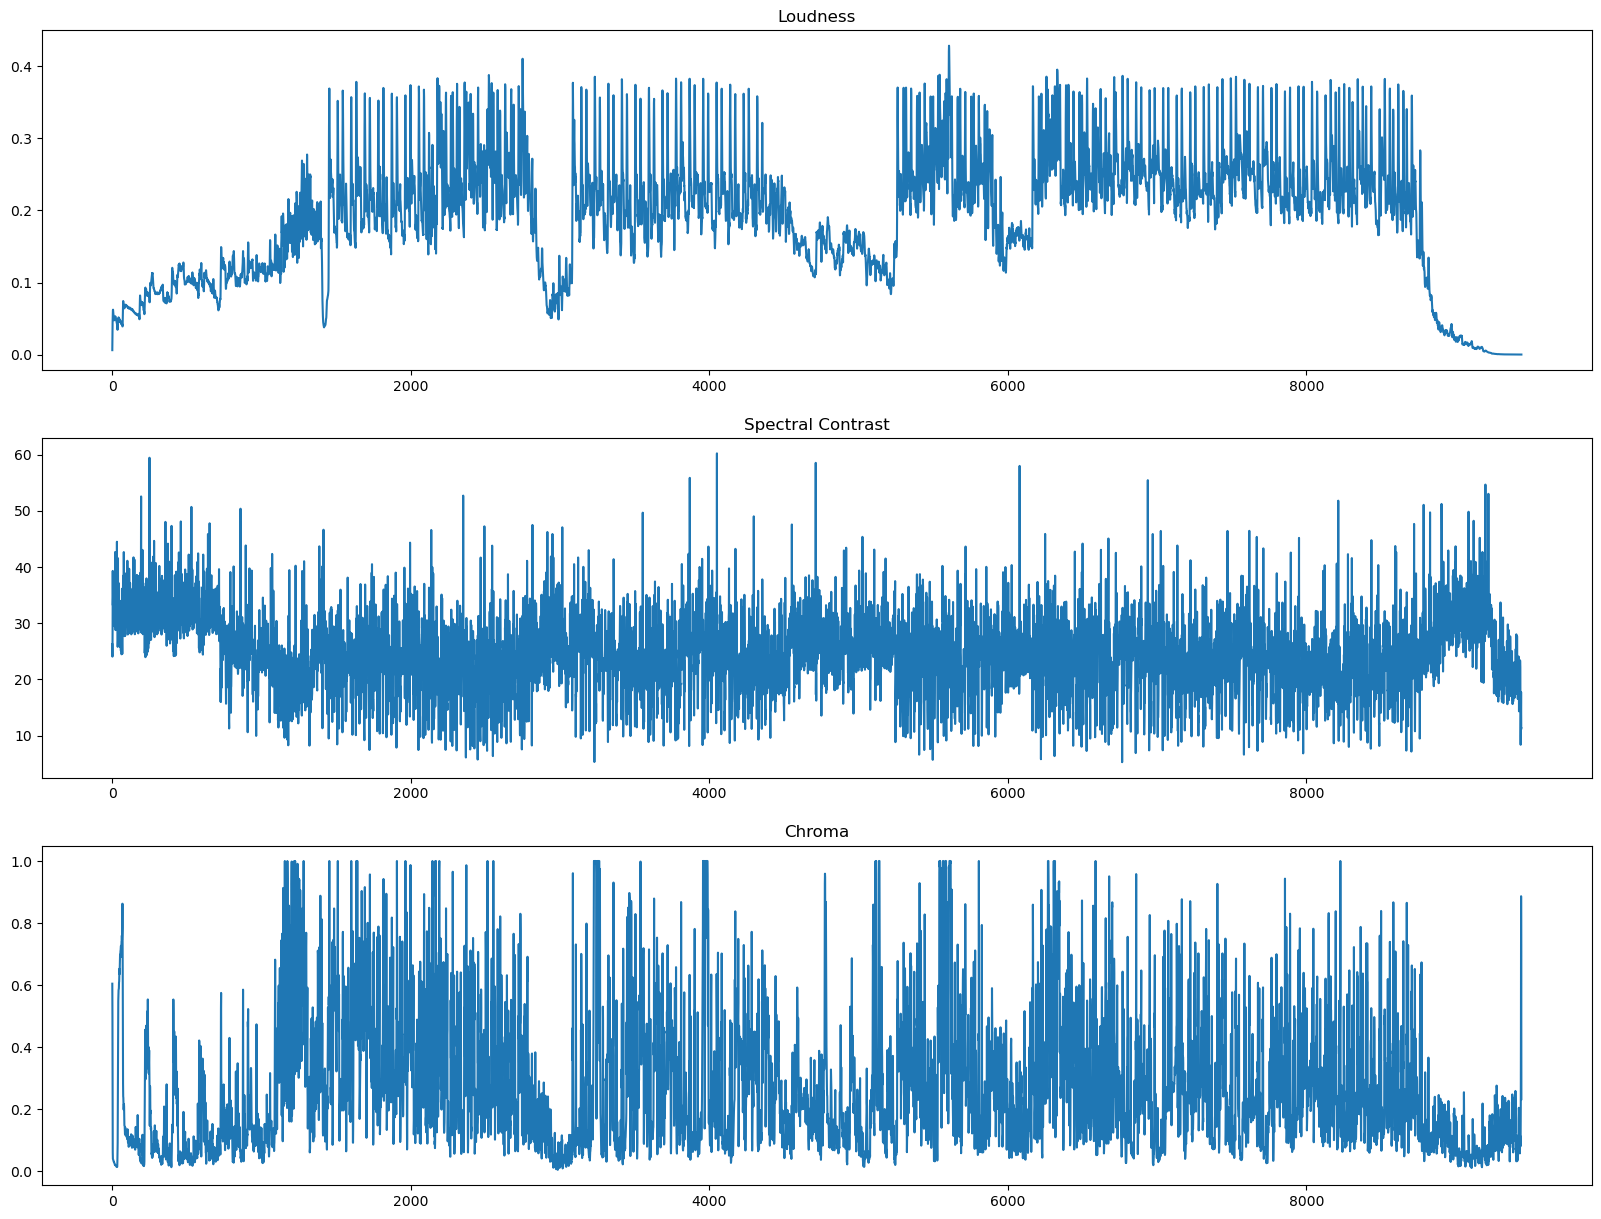

In [28]:
import torchaudio.functional as F
import librosa
intense_sound = Path("/home/siyuan/class/cmsc734/sound_vis/sounds/Hollow-Sun(chosic.com).mp3")
peace_sound = Path("/home/siyuan/class/cmsc734/sound_vis/sounds/relaxing-mountains-rivers-streams-running-water-18178.mp3")

# Load the audio file  
y_intense, sr_intense = librosa.load(intense_sound)  
  

# Extract the loudness  
loudness = librosa.feature.rms(y = y_intense)  
# Extract the spectral contrast  
contrast = librosa.feature.spectral_contrast(y=y_intense, sr=sr_intense)  
# Extract the chroma feature  
chroma_intense = librosa.feature.chroma_stft(y=y_intense, sr=sr_intense) 


# Plot the features  
plt.figure(figsize=(20, 15))  
plt.subplot(3, 1, 1)  
plt.plot(loudness[0])  
plt.title('Loudness')  
plt.subplot(3, 1, 2)  
plt.title('Spectral Contrast')
plt.plot(contrast[0]) 
plt.subplot(3, 1, 3)
plt.title('Chroma')
plt.plot(chroma_intense[0]) 

# save image
plt.savefig('intense_sound.png')

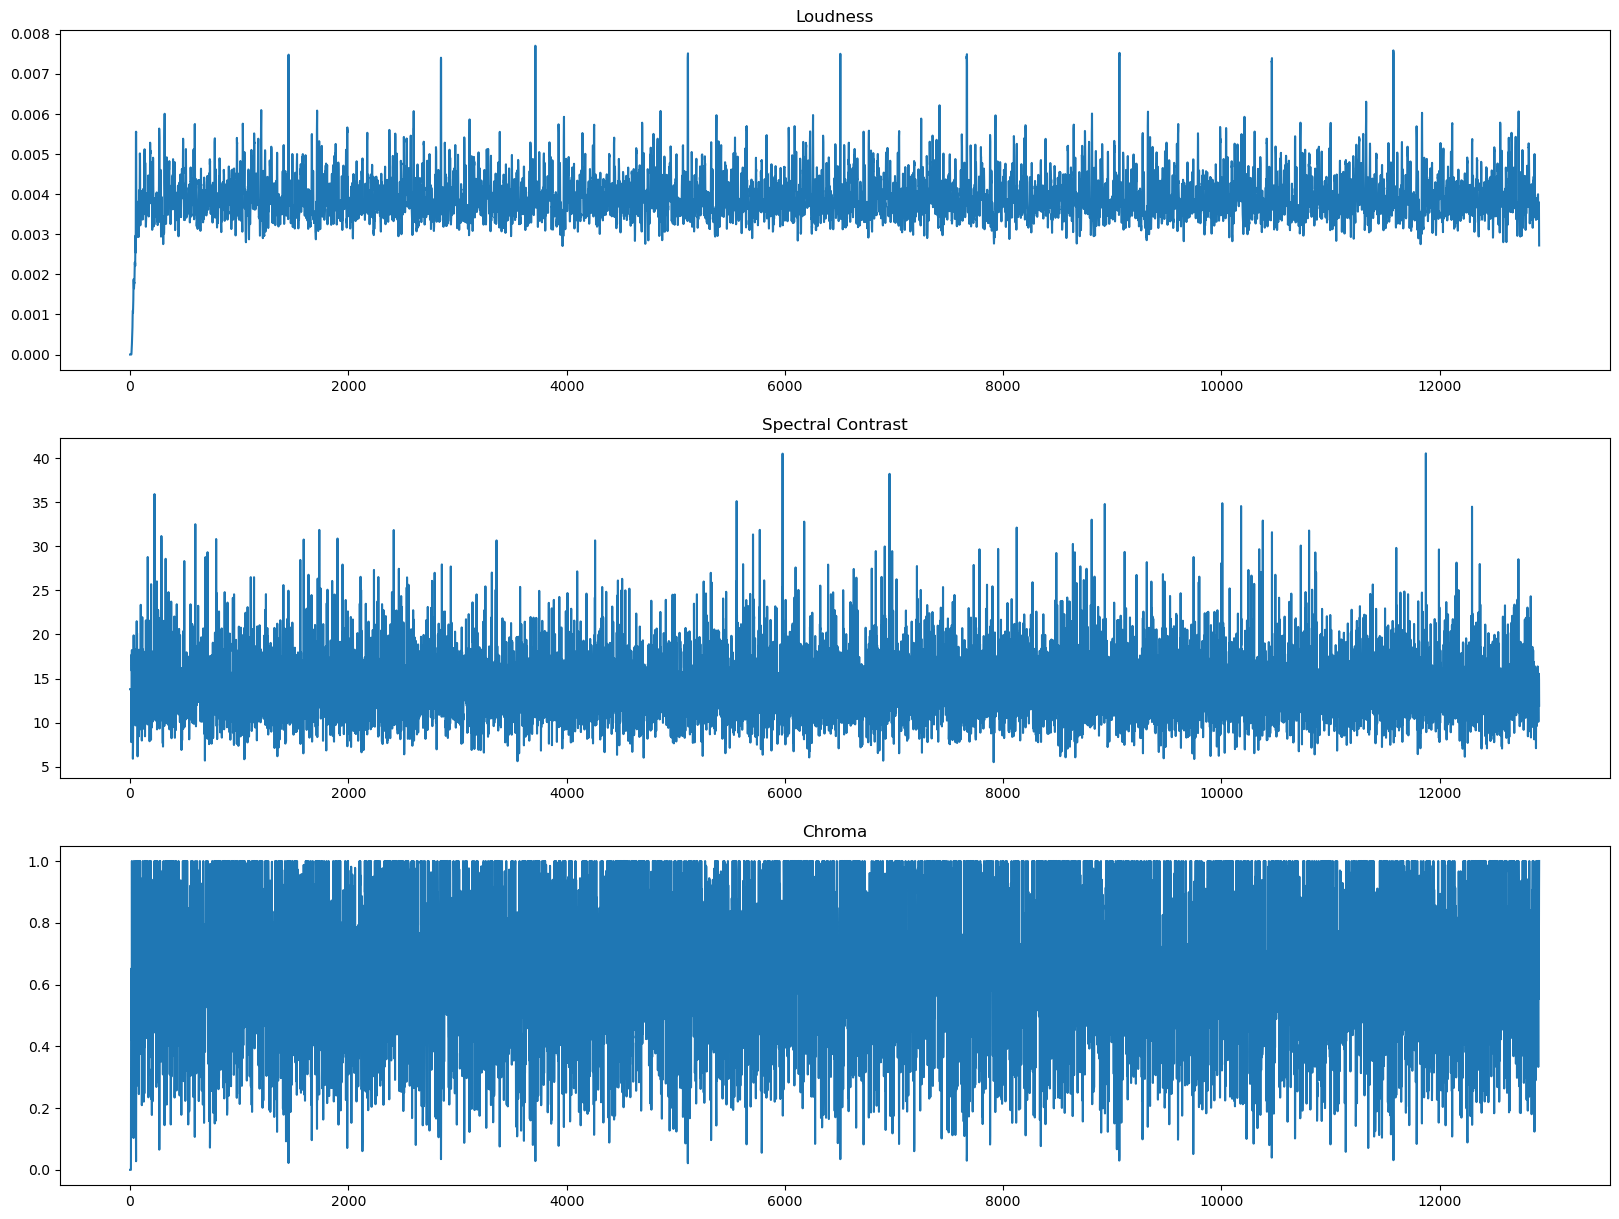

In [27]:


# Load the audio file  
y_intense, sr_intense = librosa.load(peace_sound)  
  

# Extract the loudness  
loudness = librosa.feature.rms(y = y_intense)  
# Extract the spectral contrast  
contrast = librosa.feature.spectral_contrast(y=y_intense, sr=sr_intense)  
# Extract the chroma feature  
chroma_intense = librosa.feature.chroma_stft(y=y_intense, sr=sr_intense) 


# Plot the features  
plt.figure(figsize=(20, 15))  
plt.subplot(3, 1, 1)  
plt.plot(loudness[0])  
plt.title('Loudness')  
plt.subplot(3, 1, 2)  
plt.title('Spectral Contrast')
plt.plot(contrast[0]) 
plt.subplot(3, 1, 3)
plt.title('Chroma')
plt.plot(chroma_intense[0]) 
plt.savefig('peace_sound.png')

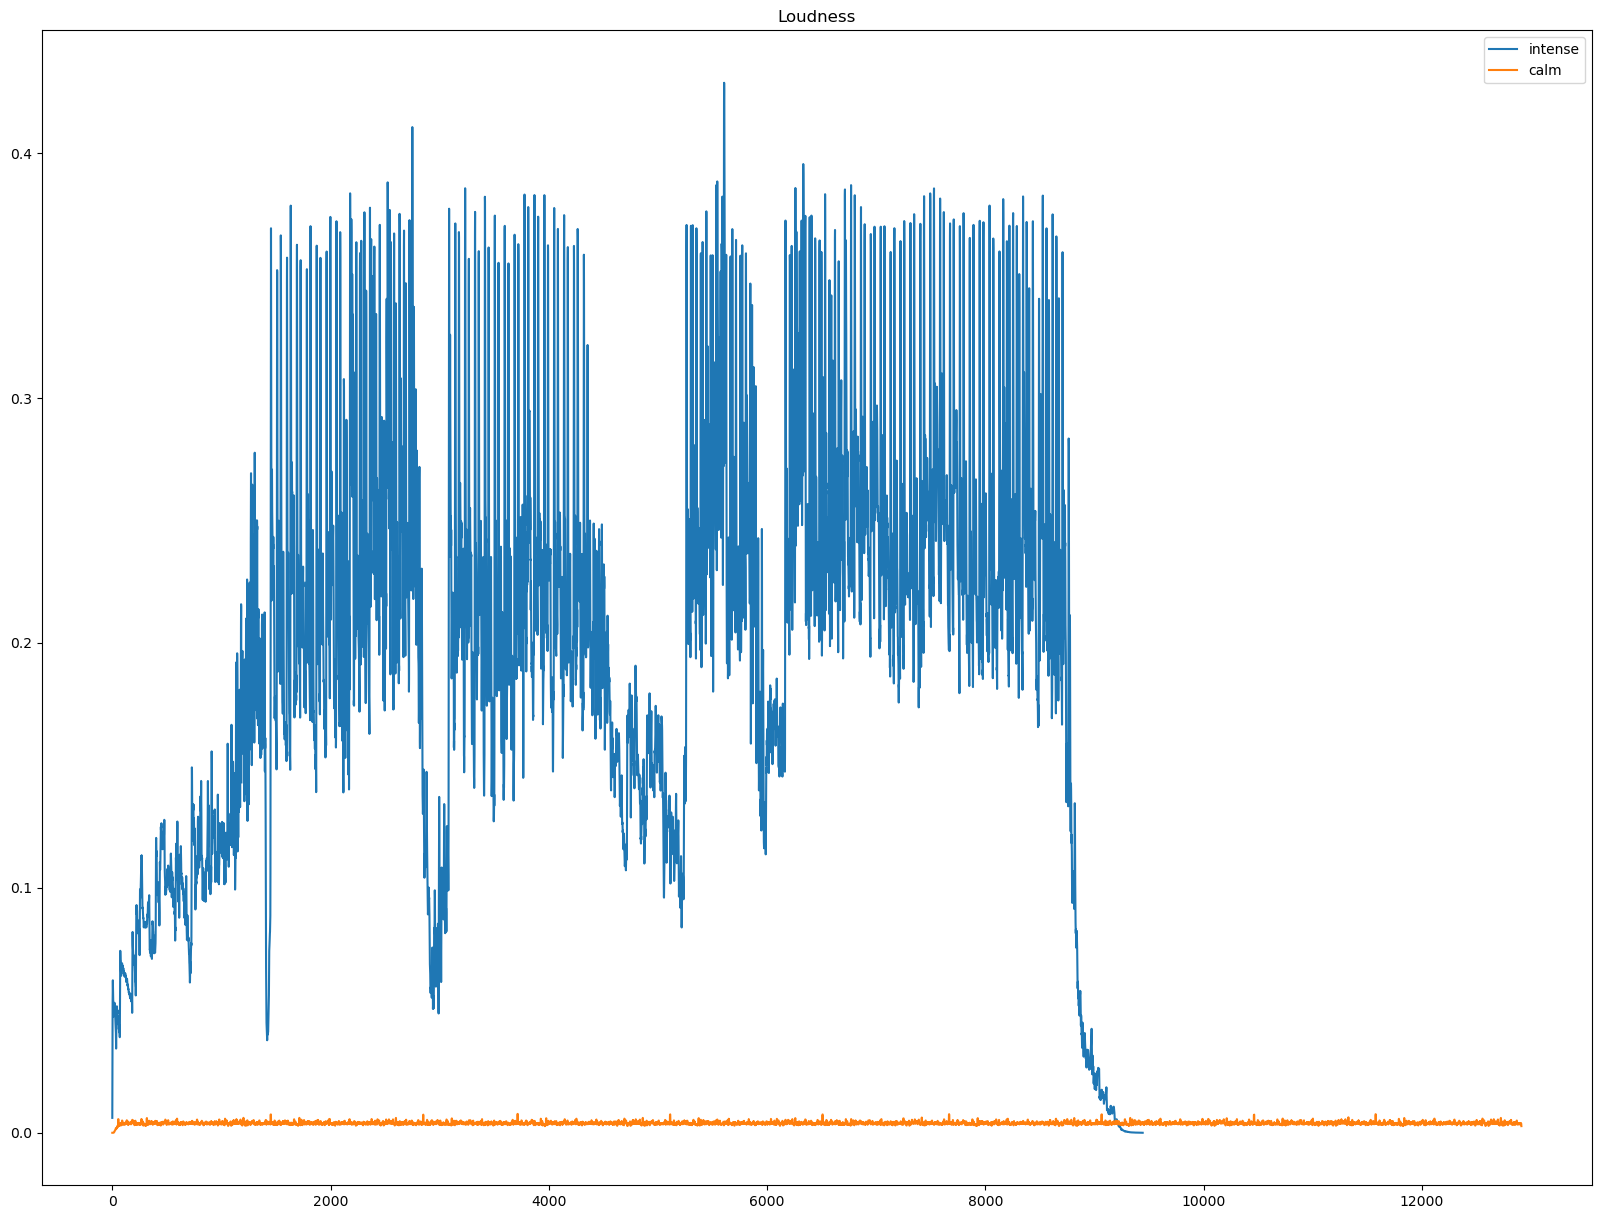

In [3]:
import torchaudio.functional as F
import librosa
intense_sound = Path("/home/siyuan/class/cmsc734/sound_vis/sounds/Hollow-Sun(chosic.com).mp3")
peace_sound = Path("/home/siyuan/class/cmsc734/sound_vis/sounds/relaxing-mountains-rivers-streams-running-water-18178.mp3")

# Load the audio file  
y_intense, sr_intense = librosa.load(intense_sound)  
y_calm, sr_calm = librosa.load(peace_sound)
  

# Extract the loudness  
loudness_intense = librosa.feature.rms(y = y_intense)  
calm_intense = librosa.feature.rms(y = y_calm)



plt.figure(figsize=(20, 15))
plt.plot(loudness_intense[0], label='intense')
plt.plot(calm_intense[0], label='calm')
plt.title('Loudness')
plt.legend()
plt.savefig('loudness.png')



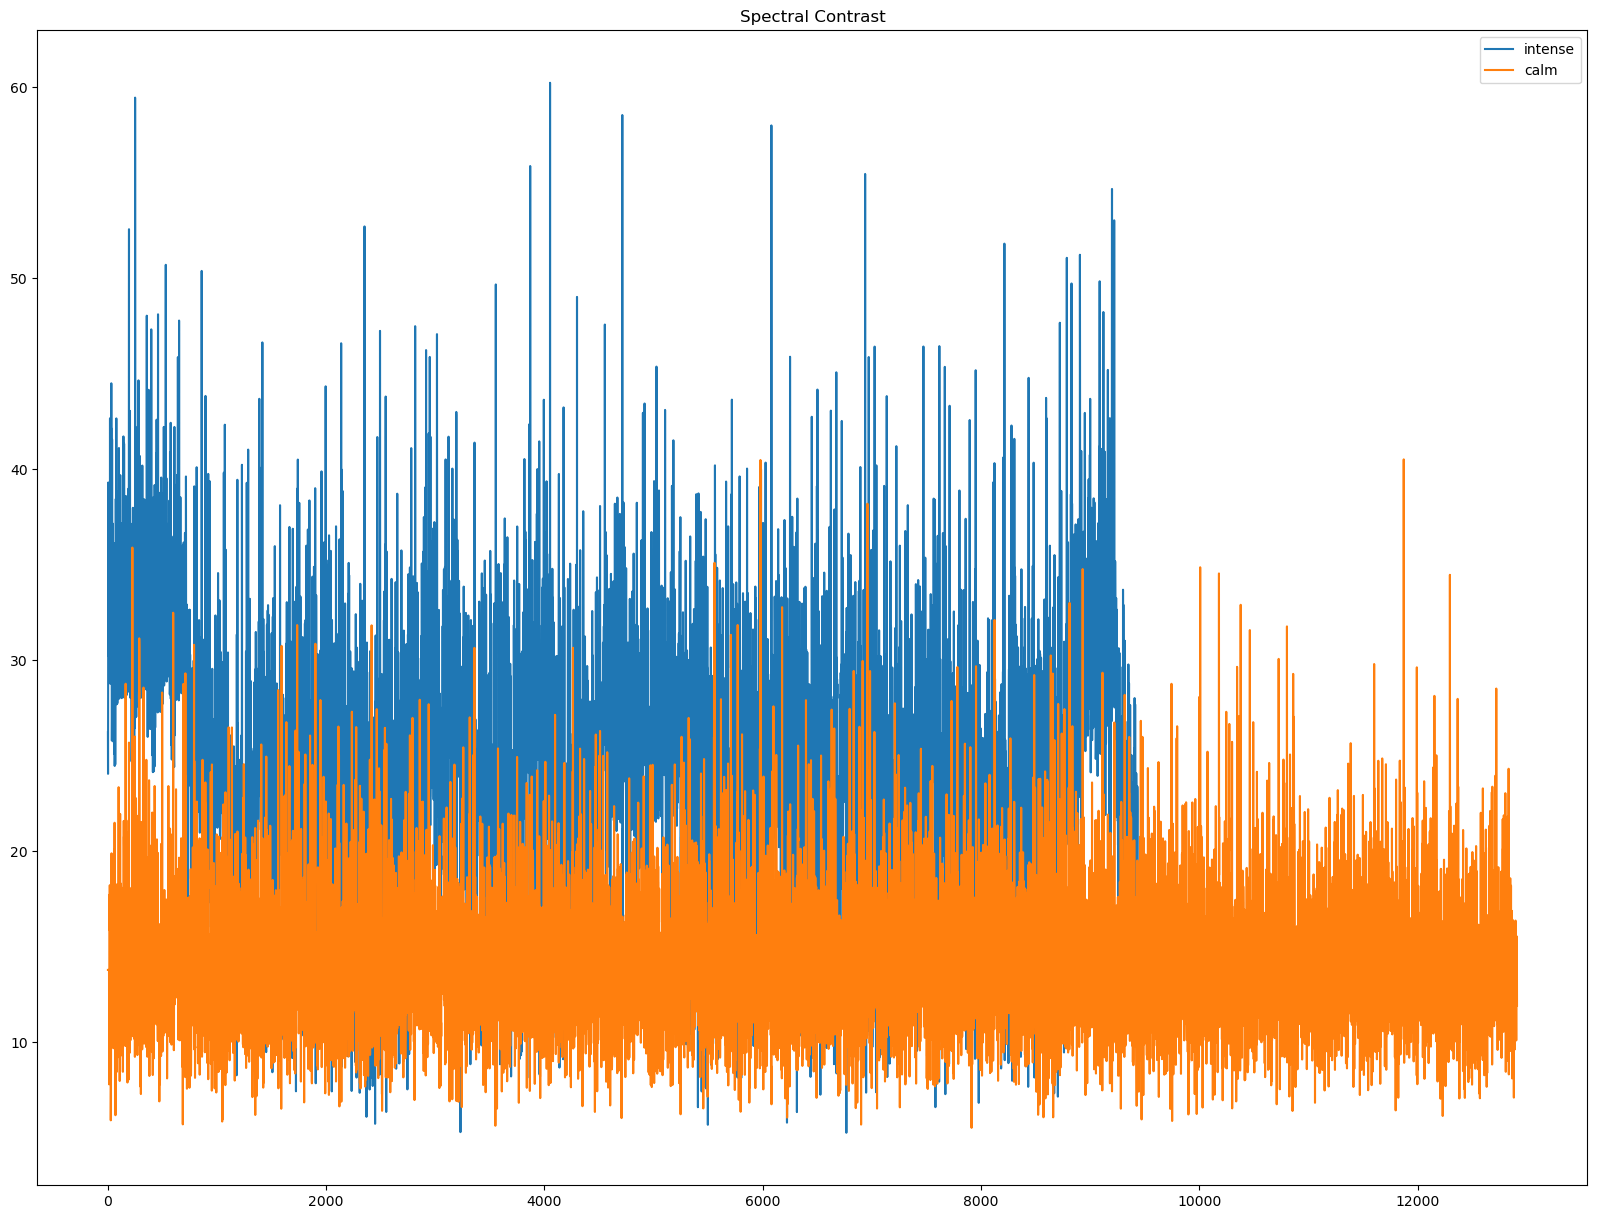

In [10]:
contrast_intense = librosa.feature.spectral_contrast(y=y_intense, sr=sr_intense)  
contrast_calm = librosa.feature.spectral_contrast(y=y_calm, sr=sr_calm)

plt.figure(figsize=(20, 15))
plt.title('Spectral Contrast')
plt.plot(contrast_intense[0], label='intense')
plt.plot(contrast_calm[0], label='calm')
plt.legend()
plt.savefig('contrast.png')


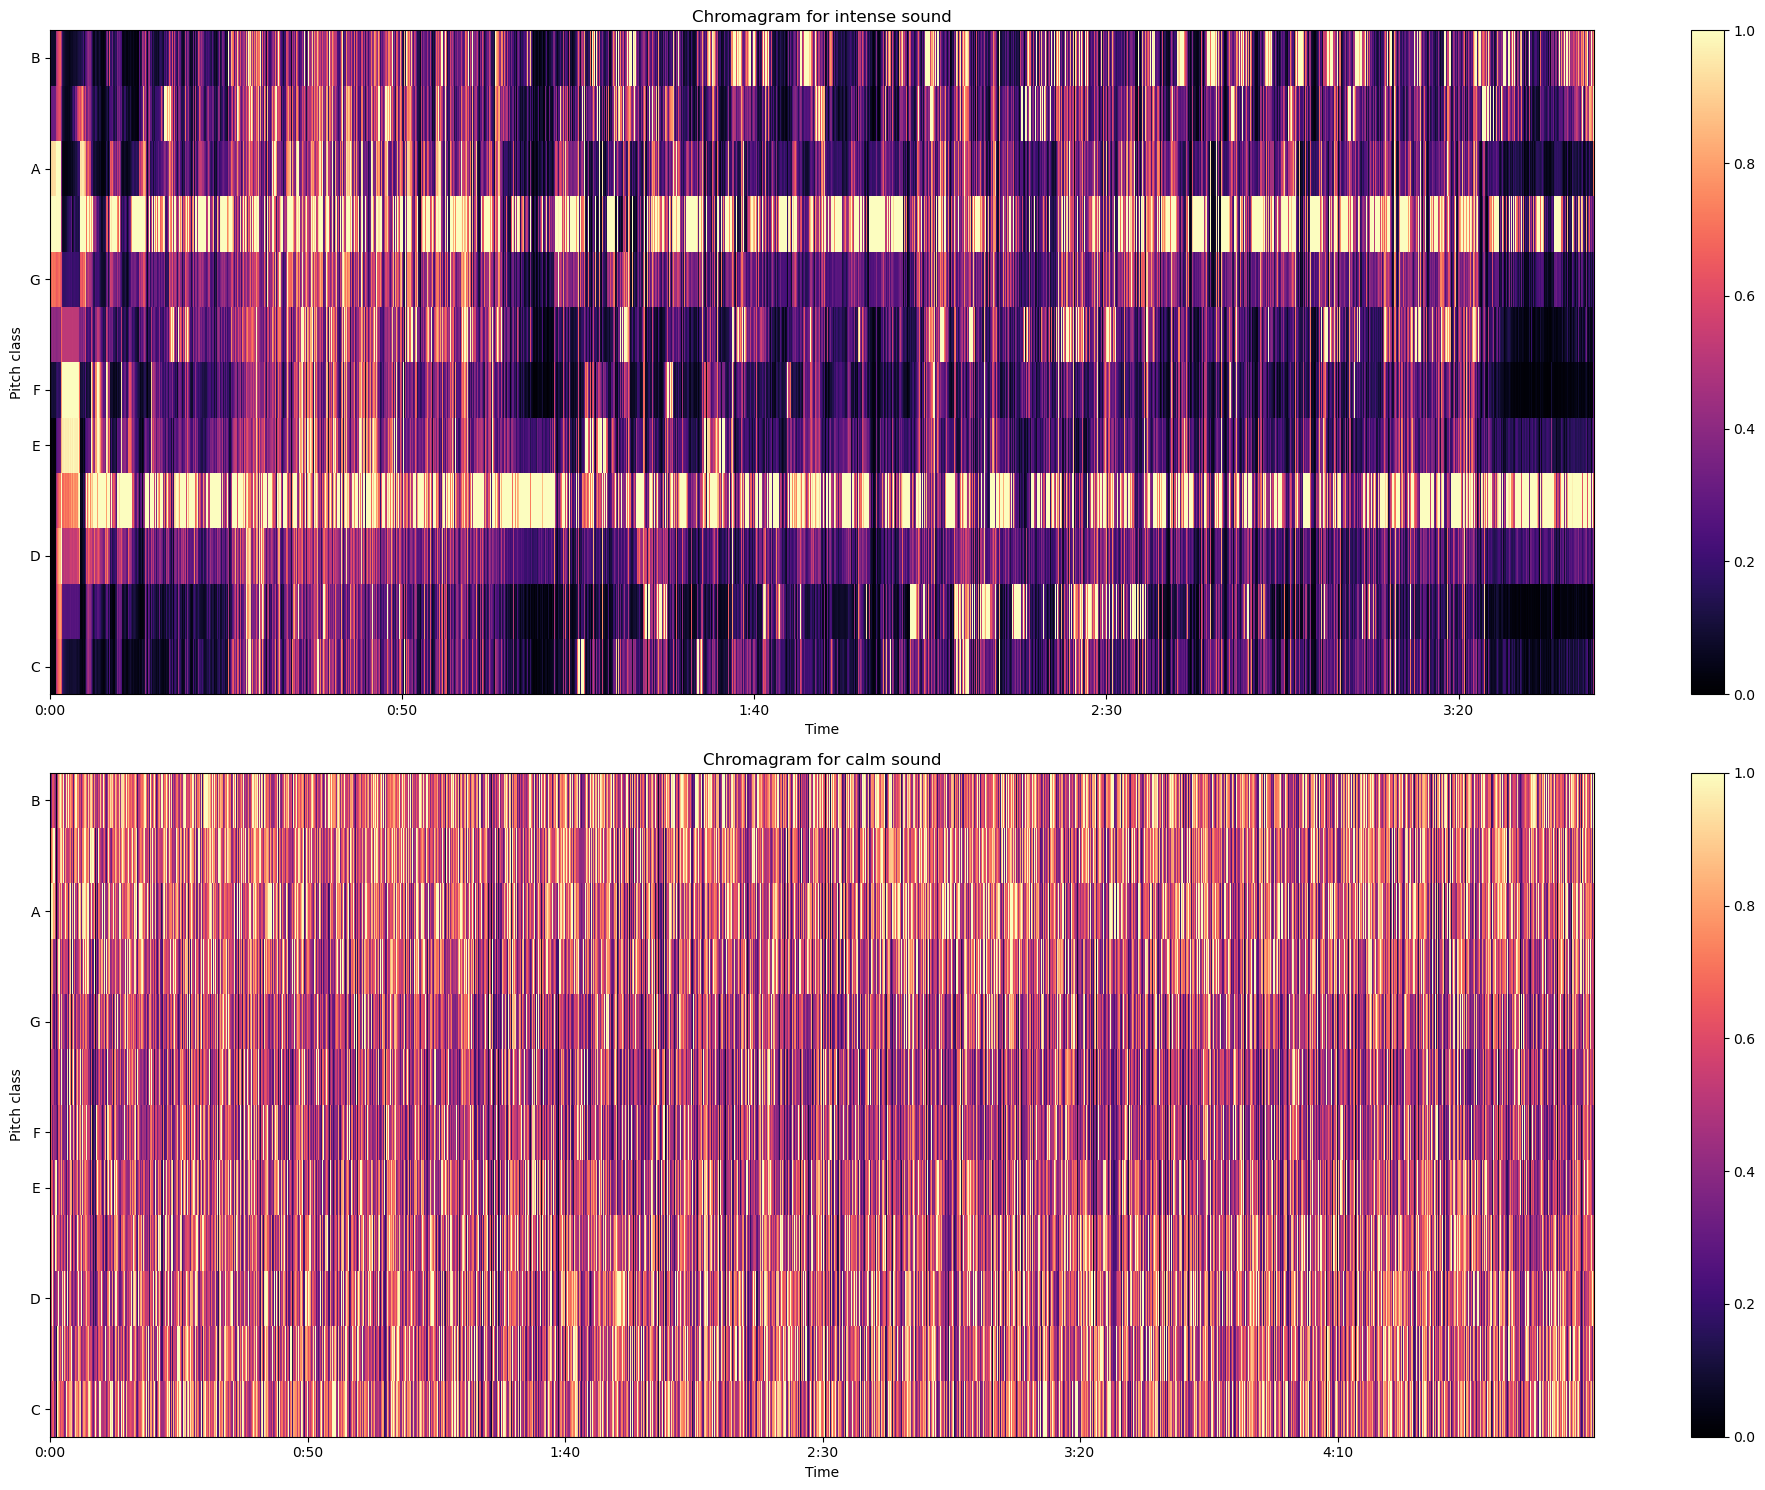

In [17]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 1, 1)
chroma_intense = librosa.feature.chroma_stft(y=y_intense, sr=sr_intense)   
librosa.display.specshow(chroma_intense, x_axis='time', y_axis='chroma', vmin=0, vmax=1) 
plt.colorbar()  
plt.title('Chromagram for intense sound')
plt.subplot(2, 1, 2)
chroma_calm = librosa.feature.chroma_stft(y=y_calm, sr=sr_calm)
librosa.display.specshow(chroma_calm, x_axis='time', y_axis='chroma', vmin=0, vmax=1)
plt.colorbar()  
plt.title('Chromagram for calm sound')
plt.tight_layout()  
plt.savefig('chroma.png')